<blockquote>
    <h1>Exercise 10.7</h1>
    <p>
        In the chapter, we mentioned the use of correlation-based distance and Euclidean distance as dissimilarity measures for hierarchical clustering. It turns out that these two measures are almost equivalent: if each observation has been centered to have mean zero and standard deviation one, and if we let $r_{ij}$ denote the correlation between the $i$th and $j$th observations, then the quantity $1 − r_{ij}$ is proportional to the squared Euclidean distance between the $i$th and $j$th observations.
    </p>
    <p>On the <code>USArrests</code> data, show that this proportionality holds.</p>
    <p><i>Hint: The Euclidean distance can be calculated using the <code>dist()</code> function, and correlations can be calculated using the <code>cor()</code> function.</i></p>
        
</blockquote>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# https://stackoverflow.com/questions/34398054/ipython-notebook-cell-multiple-outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist

In [2]:
df = pd.read_csv("../../DataSets/USArrests/USArrests.csv", index_col = 0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [3]:
scaler = StandardScaler()
df_standardized = pd.DataFrame(
    scaler.fit_transform(df),
    index=df.index,
    columns=df.columns
)

In [4]:
euclidean_distance = pdist(df_standardized, 'euclidean')**2
correlation_distance = pdist(df_standardized, 'correlation')
proportion = correlation_distance / euclidean_distance

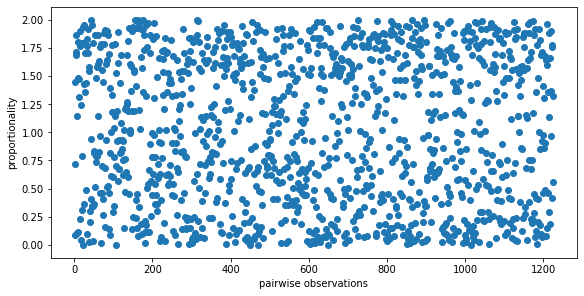

In [5]:
fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=(8, 4))
_ = ax.scatter(np.arange(1, correlation_distance.shape[0] + 1), correlation_distance)
_ = ax.set_xlabel('pairwise observations')
_ = ax.set_ylabel('proportionality')